# Student Performance Prediction

The task is to predict the G3 scores of students on the basis of given set of 33 features in the dataset.

The data is separated into two CSV files, one for Mathematics scores, one for Portugese score with a non-exclusive sets of students. Both the datasets are combined by vertical concatenation followed by removal of duplicates identified based on exact matching of characteristics. The newly formed dataset will be used as the training and the test data.

In [1509]:
! pip install xgboost

In [1510]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

### Loading and forming the dataset

In [1511]:
data1 = pd.read_csv("E:/Machine Learning Projects/Student Performance Prediction/Dataset/student/student-mat.csv",sep= ";")
data2 = pd.read_csv("E:/Machine Learning Projects/Student Performance Prediction/Dataset/student/student-por.csv",sep= ";")

In [1512]:
data1.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [1513]:
data1.shape

(395, 33)

In [1514]:
data2.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [1515]:
data2.shape

(649, 33)

In [1516]:
data1.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [1517]:
data2.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

Since data1 and data2 have the same columns they can be exactly stacked vertically over each other to make a new dataset with both the subjects marks.

In [1518]:
data = pd.concat([data1,data2],axis =0,ignore_index=True)
data.shape

(1044, 33)

In [1519]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


#### Checking for Null values

In [1520]:
data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

### Train-Test-Validation Split

Before further exploration of data, we will split the data into train and test data

In [1521]:
X_temp, X_test, y_temp, y_test = train_test_split(X,y,test_size = 0.3)

In [1522]:
X_train, X_val, y_train, y_val = train_test_split(X_temp,y_temp,test_size = 0.2)

In [1523]:
X_train.reset_index(drop = True, inplace = True)
X_test.reset_index(drop = True, inplace = True)
y_train.reset_index(drop = True, inplace = True)
y_test.reset_index(drop = True, inplace = True)
X_val.reset_index(drop = True, inplace = True)
y_val.reset_index(drop = True, inplace = True)

In [1524]:
X_train.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000
mean,16.741438,2.604452,2.410959,1.520548,1.986301,0.275685,3.929795,3.196918,3.142123,1.511986,2.315068,3.613014,4.251712
std,1.264339,1.145974,1.103068,0.728910,0.846636,0.683818,0.915018,1.049671,1.112230,0.899701,1.284575,1.401140,6.233589
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000


Since all the numerical parameters have a maximum rating of 4 or 5 (other than age and absences), we do not to normalise the dataset

## Feature Selection

#### Dropping columsn G1 and G2 

The dataset contains three columns with the scores of students for their first, second and third periods namely G1, G2 and G3. The target will be to predict the G3 score for each student using the parameters given and attain maximum accuracy. Since G1 and G2 are the students' scores of first and second years, they are highly suggestive of a students' marks in their third years and hence, obstruct the assessment of marks through normally available features (in a general case).

In [1525]:
data.drop(["G1","G2"],axis = 1, inplace=True)

#### Logical Screening of Attributes (columns)

In [1526]:
# Reading File with attributes description
f = open("E:/Machine Learning Projects/Student Performance Prediction/Dataset/student/student.txt","r")
while True:
    line = f.readline()
    if line == "":
        break
    print(line,end = " ")

# Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:
 1 school - student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)
 2 sex - student's sex (binary: "F" - female or "M" - male)
 3 age - student's age (numeric: from 15 to 22)
 4 address - student's home address type (binary: "U" - urban or "R" - rural)
 5 famsize - family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)
 6 Pstatus - parent's cohabitation status (binary: "T" - living together or "A" - apart)
 7 Medu - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
 8 Fedu - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
 9 Mjob - mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or p

On preliminary screening of the features, all the features seem relevant to the determination of a student's marks.

Now, we will extract the target variable (G3) from the dataset and save it as y and save the existing dataset after dropping G3 as X.

In [1527]:
y = data["G3"]
X = data.drop("G3",axis = 1)

In [1528]:
categorical = [var for var in X_train.columns if X_train[var].dtype =="O"]
numerical = [var for var in X_train.columns if X_train[var].dtype != "O"]

In [1529]:
numerical

['age',
 'Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences']

In [1530]:
categorical

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

### Evaluating the numerical variables

In [1531]:
num_train = X_train[numerical]
num_train

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
0,17,1,1,3,1,1,5,2,1,1,2,1,0
1,16,2,1,2,2,0,5,2,1,1,1,2,0
2,16,2,1,1,2,0,4,3,5,1,1,5,2
3,18,4,2,1,2,0,4,2,2,1,1,3,0
4,19,4,4,2,2,0,2,3,4,2,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
579,16,2,1,3,1,0,4,3,3,1,1,4,7
580,17,2,4,1,2,0,5,4,2,2,3,5,0
581,16,1,2,2,1,0,5,4,5,1,4,2,0
582,18,2,1,2,1,0,4,4,3,1,3,5,5


In [1532]:
cr_list = []
for var in numerical:
    cr = y_train.corr(X_train[var])
    cr_list.append(cr)
    print(f"{var}:  {cr}")

age:  -0.141750974720239
Medu:  0.1535095371164405
Fedu:  0.12162456695203908
traveltime:  -0.1339883474160381
studytime:  0.1600460431149653
failures:  -0.3587241223887699
famrel:  0.03424436956334236
freetime:  -0.10452475444272287
goout:  -0.14762761756712406
Dalc:  -0.1450721232849332
Walc:  -0.13459811698095206
health:  -0.03883905464376392
absences:  -0.06204505896056469


### Plotting the absolute values of correlations to find their importance

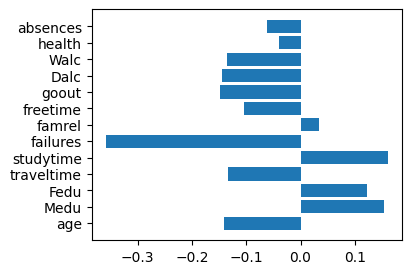

In [1533]:
plt.figure(figsize = (4,3))
plt.barh(numerical, cr_list)
plt.show()

#### Observations

- Health, age, family relations,absences, free time and travel time have almost negligible correlation with y.
- Study time, weekly alcohol, daily alcohol, going ou and father's education have a slighly hihger correlation.
- Mother's education and number of past failures has a considerable correlation.

### Removing unrelated numerical variables

In [1534]:
X_train.drop(["health","age","famrel","absences","freetime","traveltime"],axis = 1, inplace = True)

### Evaluating categorical variables

In [1535]:
for var in categorical:
    print(X_train[var].value_counts()/len(X_train))
    print("--------------------------------------")

school
GP    0.731164
MS    0.268836
Name: count, dtype: float64
--------------------------------------
sex
F    0.561644
M    0.438356
Name: count, dtype: float64
--------------------------------------
address
U    0.705479
R    0.294521
Name: count, dtype: float64
--------------------------------------
famsize
GT3    0.72089
LE3    0.27911
Name: count, dtype: float64
--------------------------------------
Pstatus
T    0.883562
A    0.116438
Name: count, dtype: float64
--------------------------------------
Mjob
other       0.363014
services    0.219178
at_home     0.198630
teacher     0.138699
health      0.080479
Name: count, dtype: float64
--------------------------------------
Fjob
other       0.568493
services    0.282534
teacher     0.065068
at_home     0.054795
health      0.029110
Name: count, dtype: float64
--------------------------------------
reason
course        0.402397
home          0.260274
reputation    0.236301
other         0.101027
Name: count, dtype: float64
-----

In [1536]:
def categorical_analysis(ctg_var):
    '''
    Determines the differences in students' perfromnace
    based on different categories of a categorical variable

    Arguement: Categorical Variable

    Output: Mean of students' marks for different categories
    and a bar plot representing the means
    '''
    ctg_analysis = pd.DataFrame()
    ctg_analysis["Index"] = np.arange(731)
    total_ctgs = X_train[ctg_var].unique()
    for ctg in range(len(total_ctgs)):
        one_ctg = total_ctgs[ctg]
        req_indices = X_train.index[X_train[ctg_var]== one_ctg].tolist()
        ctg_analysis[one_ctg] = y_train.iloc[req_indices]
    performance = ctg_analysis.mean()
    performance.drop("Index",inplace = True)

    plt.figure(figsize = (4,3))
    plt.bar(total_ctgs,performance, width = 0.5) 
    plt.xlabel("Categories")
    plt.ylabel("Marks out of 20")
    plt.title(f"Effect of {ctg_var} on student performance")
    plt.show()

    return performance
        

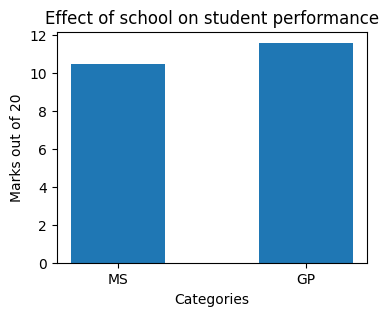

MS    10.458599
GP    11.601874
dtype: float64
-------------------------------------------------------


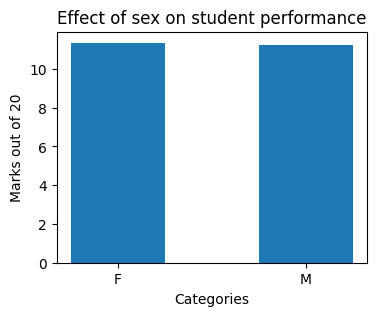

F    11.350610
M    11.222656
dtype: float64
-------------------------------------------------------


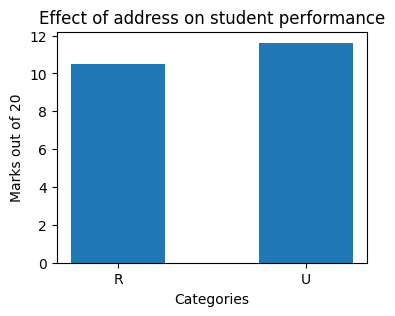

R    10.500000
U    11.626214
dtype: float64
-------------------------------------------------------


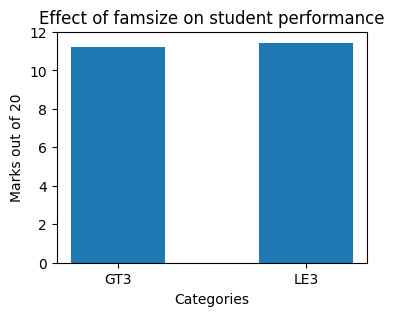

GT3    11.237530
LE3    11.441718
dtype: float64
-------------------------------------------------------


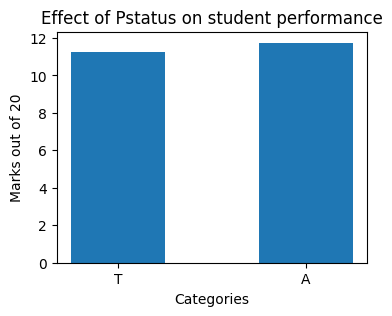

T    11.234496
A    11.750000
dtype: float64
-------------------------------------------------------


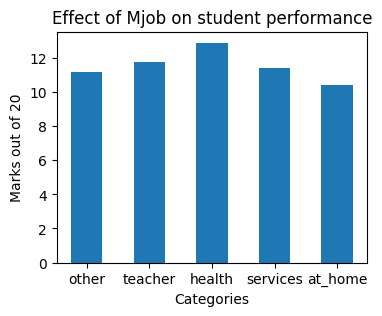

other       11.198113
teacher     11.728395
health      12.893617
services    11.375000
at_home     10.431034
dtype: float64
-------------------------------------------------------


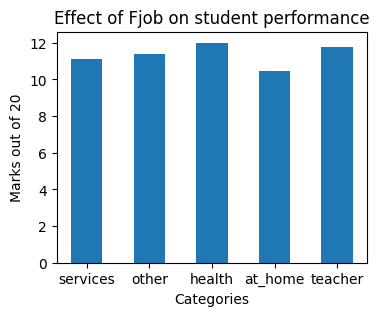

services    11.090909
other       11.385542
health      12.000000
at_home     10.468750
teacher     11.763158
dtype: float64
-------------------------------------------------------


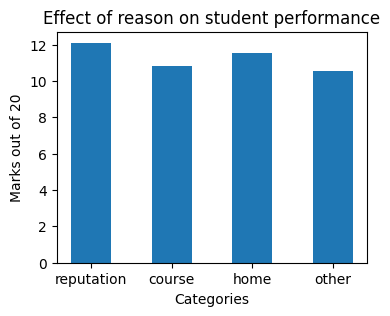

reputation    12.101449
course        10.842553
home          11.552632
other         10.542373
dtype: float64
-------------------------------------------------------


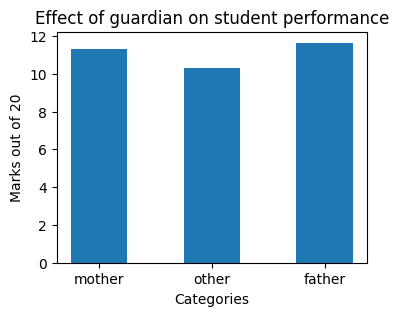

mother    11.292383
other     10.288889
father    11.643939
dtype: float64
-------------------------------------------------------


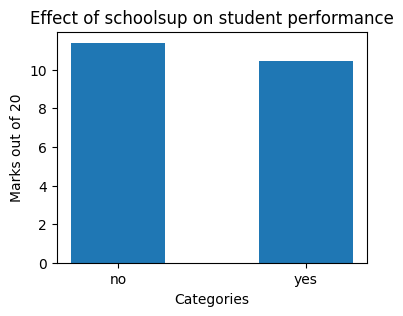

no     11.401544
yes    10.454545
dtype: float64
-------------------------------------------------------


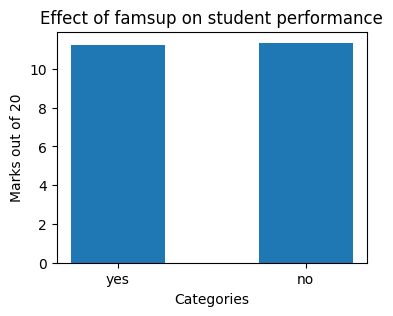

yes    11.256484
no     11.350211
dtype: float64
-------------------------------------------------------


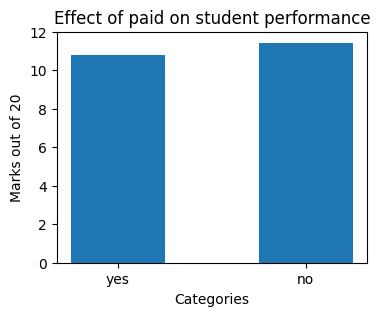

yes    10.789062
no     11.436404
dtype: float64
-------------------------------------------------------


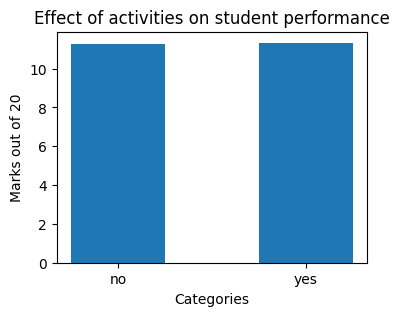

no     11.258278
yes    11.333333
dtype: float64
-------------------------------------------------------


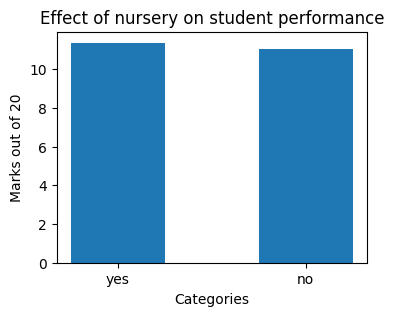

yes    11.360515
no     11.033898
dtype: float64
-------------------------------------------------------


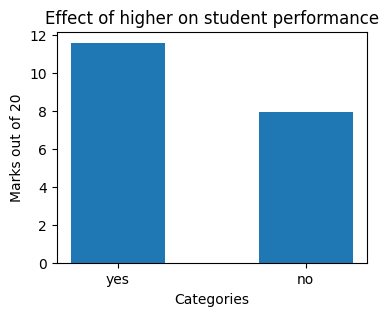

yes    11.579926
no      7.956522
dtype: float64
-------------------------------------------------------


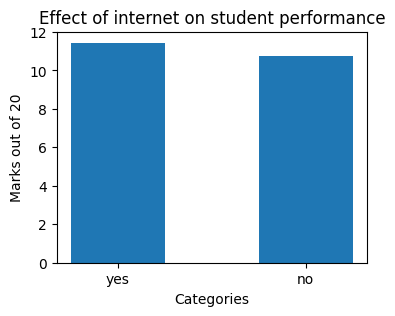

yes    11.438865
no     10.769841
dtype: float64
-------------------------------------------------------


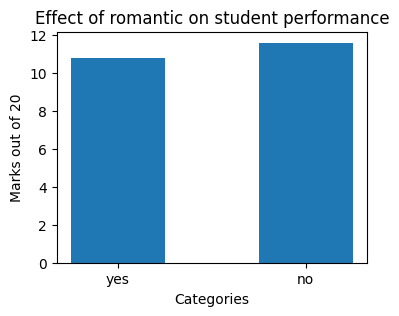

yes    10.794521
no     11.594521
dtype: float64
-------------------------------------------------------


In [1537]:
for cat in categorical:
    print(categorical_analysis(cat))
    print("-------------------------------------------------------")

#### Observation

- There is a significant difference in the mean of student marks on the basis of MJob, FJob, Gaurdian, reason for joining and higher education plans.
- There is a moderate difference in student performance on the basis of school, address, school support, internet and romantic relationship.
- Unnoticeable difference in students' performance on the basis of their sex, family size, Parent living status, family support, paid tuition, extra activities and attending nursery.


Out of categorical variables, the unnoticeable difference variables can be removed, while the significant ones and  moderate importance features can be retained.

#### Removing unrelated categorical variables

In [1538]:
X_train.drop(["sex","famsize","Pstatus","famsup","paid","activities"], axis = 1,inplace = True)

In [1539]:
final_cols = X_train.columns
final_cols

Index(['school', 'address', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason',
       'guardian', 'studytime', 'failures', 'schoolsup', 'nursery', 'higher',
       'internet', 'romantic', 'goout', 'Dalc', 'Walc'],
      dtype='object')

In [1540]:
# X_train = pd.get_dummies(X_train)

In [1541]:
X_train.head()
X_train.columns

Index(['school', 'address', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason',
       'guardian', 'studytime', 'failures', 'schoolsup', 'nursery', 'higher',
       'internet', 'romantic', 'goout', 'Dalc', 'Walc'],
      dtype='object')

## Training the models

For model training, we will be using two datasets: 
1. Dataset with shortlisted features without additional features
2. Dataset with shortlisted features combined to make 2nd degree polynomial features

The models trained will be assessed for their performance on the basis of mean absolute error and root mean squared error.
The following types of models will be implemented on both the versions of the dataset:
- Linear Regression
- XGBoost Regression
- Ridge Regression
- Lasso Regression

### Training the models on Existing Features Dataset
This Dataset consists of the shortlisted features in their exisitng form without creation of new features by combining any features

In [1542]:
# Preprocessing Function for the Datasets 

def normal_preprocess(X,y):
    X_pre = X[final_cols]
    X_pre_1 = pd.get_dummies(X_pre)
    X_final = np.array(X_pre_1)
    y_pre = np.array(y)

    return X_final,y_pre

In [1543]:
def evaluate_model_normal(model,X_train,y_tain,X_test,y_test):
    '''
    Takes the model, train set and test set as the arguement
    and returns the evaluation score for the model
    '''
    #Preprocessing
    X_arr, y_arr = normal_preprocess(X_train, y_train)               
    X_test_pre, y_test_pre = normal_preprocess(X_test, y_test)

    # Fitting 
    model.fit(X_arr,y_arr)           

    #Predicting                                
    train_preds = model.predict(X_arr)                               
    test_preds = model.predict(X_test_pre)                           
    
    # Evaluating model
    mae_train = mean_absolute_error(y_arr,train_preds)
    mse_train = mean_squared_error(y_arr,train_preds)
    mae_val = mean_absolute_error(y_val,test_preds)
    mse_val = mean_squared_error(y_val,test_preds)

    return mae_train, mse_train, mae_val, mse_val


In [1544]:
# Creating Empty lists to store the mae, mse of all models

mae_all = []
mse_all = []

#### Model 1: Linear Regression Model

In [1545]:
lr_model = LinearRegression()

lr_mae_train, lr_mse_train, lr_mae_val, lr_mse_val = evaluate_model_normal(lr_model, X_train, y_train, X_val, y_val)

mae_all.append(lr_mae_val)
mse_all.append(lr_mse_val)

print(f"The Mean Absolute Error on Training Data is: {lr_mae_train}")
print(f"The Mean Squared Error on Training Data is: {lr_mse_train}")
print(f"The Mean Absolute Error on Validation Data is: {lr_mae_val}")
print(f"The Mean Squared Error on Validation Data is: {lr_mse_val}")

The Mean Absolute Error on Training Data is: 2.4112933433219177
The Mean Squared Error on Training Data is: 11.750051315516641
The Mean Absolute Error on Validation Data is: 2.7675513698630136
The Mean Squared Error on Validation Data is: 14.211576278895548


#### Model 2: XGBRegressor

In [1546]:
xgbr_model = xgb.XGBRegressor()

xgb_mae_train, xgb_mse_train, xgb_mae_val, xgb_mse_val = evaluate_model_normal(xgbr_model, X_train, y_train, X_val, y_val)

mae_all.append(xgb_mae_val)
mse_all.append(xgb_mse_val)

print(f"The Mean Absolute Error on Training Data is: {xgb_mae_train}")
print(f"The Mean Squared Error on Training Data is: {xgb_mse_train}")
print(f"The Mean Absolute Error on Validation Data is: {xgb_mae_val}")
print(f"The Mean Squared Error on Validation Data is: {xgb_mse_val}")

The Mean Absolute Error on Training Data is: 0.5838944260471529
The Mean Squared Error on Training Data is: 1.8010855884247994
The Mean Absolute Error on Validation Data is: 2.9509664169729573
The Mean Squared Error on Validation Data is: 16.68972424867685


#### Model 2a: XGBRegressor with Early Stopping

Since the XGBRegressor is overfitting the data, we can use early stopping to fit a model for better general performance.

In [1547]:
xgbr_model_2 = xgb.XGBRegressor()

X_arr, y_arr = normal_preprocess(X_train, y_train)  
X_v, y_v = normal_preprocess(X_val, y_val)    


In [1548]:
eval_set = [(X_v,y_v)]

xgbr_model_2.fit(X_arr, y_arr , eval_metric="rmse", eval_set=eval_set, verbose=True, early_stopping_rounds = 5)

[0]	validation_0-rmse:8.89838
[1]	validation_0-rmse:6.82356
[2]	validation_0-rmse:5.52104
[3]	validation_0-rmse:4.74537
[4]	validation_0-rmse:4.28009
[5]	validation_0-rmse:4.01365
[6]	validation_0-rmse:3.89711
[7]	validation_0-rmse:3.81775
[8]	validation_0-rmse:3.75291
[9]	validation_0-rmse:3.74635
[10]	validation_0-rmse:3.75351
[11]	validation_0-rmse:3.75647
[12]	validation_0-rmse:3.75609
[13]	validation_0-rmse:3.75633


c:\New folder\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\New folder\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [1549]:
xgbr_2_train_preds = xgbr_model_2.predict(X_arr)                              
xgbr_2_test_preds = xgbr_model_2.predict(X_v)   

In [1550]:
mae_2a_train = mean_absolute_error(y_arr, xgbr_2_train_preds)
mse_2a_train = mean_squared_error(y_arr, xgbr_2_train_preds)
mae_2a = mean_absolute_error(y_v, xgbr_2_test_preds)
mse_2a = mean_squared_error(y_v, xgbr_2_test_preds)

mae_all.append(mae_2a)
mse_all.append(mse_2a)


In [1551]:
print(f"The Mean Absolute Error on Training Data is: {mae_2a_train}")
print(f"The Mean Squared Error on Training Data is: {mse_2a_train}")
print(f"The Mean Absolute Error on Validation Data is: {mae_2a}")
print(f"The Mean Squared Error on Validation Data is: {mse_2a}")

The Mean Absolute Error on Training Data is: 1.6464118350118602
The Mean Squared Error on Training Data is: 5.1454758093505255
The Mean Absolute Error on Validation Data is: 2.753834445182591
The Mean Squared Error on Validation Data is: 14.035148010307108


#### Model 3: Ridge Regressor

In [1552]:
ridge = Ridge()

X_arr,y_arr = normal_preprocess(X_train,y_train)
X_v,y_v = normal_preprocess(X_val,y_val)

X_full = np.vstack([X_arr,X_v])
y_full = np.hstack([y_arr, y_v])

param_grid = {"alpha":[0.0001, 0.001, 0.01, 0.1, 0.5, 1, 2, 5, 10,100]}

ridge_regressor=GridSearchCV(ridge,param_grid = param_grid,scoring='neg_mean_squared_error',cv=5)

ridge_regressor.fit(X_full,y_full)
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 100}
-13.121634040153586


Hence, we choose the parameter alpha as 100 and use Ridge Regression

In [1553]:
X_arr,y_arr = normal_preprocess(X_train,y_train)
X_v,y_v = normal_preprocess(X_val,y_val)

In [1554]:
ridge = Ridge(alpha = 100)
ridge.fit(X_arr,y_arr)

Ridge(alpha=100)

In [1555]:
ridge_train_preds = ridge.predict(X_arr)                              
ridge_val_preds = ridge.predict(X_v)   

In [1556]:
mae_3_train = mean_absolute_error(y_arr, ridge_train_preds)
mse_3_train = mean_squared_error(y_arr, ridge_train_preds)
mae_3 = mean_absolute_error(y_v, ridge_val_preds)
mse_3 = mean_squared_error(y_v, ridge_val_preds)

mae_all.append(mae_3)
mse_all.append(mse_3)

In [1557]:
print(f"The Mean Absolute Error on Training Data is: {mae_3_train}")
print(f"The Mean Squared Error on Training Data is: {mse_3_train}")
print(f"The Mean Absolute Error on Validation Data is: {mae_3}")
print(f"The Mean Squared Error on Validation Data is: {mse_3}")

The Mean Absolute Error on Training Data is: 2.433343976019506
The Mean Squared Error on Training Data is: 12.006925905148146
The Mean Absolute Error on Validation Data is: 2.834806420922231
The Mean Squared Error on Validation Data is: 14.781057106514073


#### Model 4: Lasso Regressor

In [1558]:
lasso = Lasso()

X_arr,y_arr = normal_preprocess(X_train,y_train)
X_v,y_v = normal_preprocess(X_val,y_val)

X_full = np.vstack([X_arr,X_v])
y_full = np.hstack([y_arr, y_v])

param_grid = {"alpha":[0.0001, 0.001, 0.01, 0.1, 0.5, 1, 2, 5, 10,100]}

lasso_regressor=GridSearchCV(lasso,param_grid = param_grid,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(X_full,y_full)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 0.01}
-13.127792252169025


Hence, we choose the alpha = 0.01 for Lasso Regressor 

In [1559]:
X_arr,y_arr = normal_preprocess(X_train,y_train)
X_v,y_v = normal_preprocess(X_val,y_val)

In [1560]:
lasso = Lasso(alpha = 0.01)
lasso.fit(X_arr,y_arr)

Lasso(alpha=0.01)

In [1561]:
lasso_train_preds = lasso.predict(X_arr)                              
lasso_val_preds = lasso.predict(X_v)   

In [1562]:
mae_4_train = mean_absolute_error(y_arr, lasso_train_preds)
mse_4_train = mean_squared_error(y_arr, lasso_train_preds)
mae_4 = mean_absolute_error(y_v, lasso_val_preds)
mse_4 = mean_squared_error(y_v, lasso_val_preds)

mae_all.append(mae_4)
mse_all.append(mse_4)

In [1563]:
print(f"The Mean Absolute Error on Training Data is: {mae_4_train}")
print(f"The Mean Squared Error on Training Data is: {mse_4_train}")
print(f"The Mean Absolute Error on Validation Data is: {mae_4}")
print(f"The Mean Squared Error on Validation Data is: {mse_4}")

The Mean Absolute Error on Training Data is: 2.416668443805737
The Mean Squared Error on Training Data is: 11.76349722935045
The Mean Absolute Error on Validation Data is: 2.783049193837458
The Mean Squared Error on Validation Data is: 14.303200036544116


#### Training Model on Polynomial Features
The features from the dataset are combined together to form polynomial features of degree 2 to fit a better model for marks prediction.

In [1564]:
polyfit = PolynomialFeatures(2)

In [1565]:
def poly_preprocess(X,y):
    X_pre = X[final_cols]
    X_pre_1 = pd.get_dummies(X_pre)
    X_final = np.array(X_pre_1)
    X_poly = polyfit.fit_transform(X_final)
    y_pre = np.array(y)

    return X_poly,y_pre

In [1566]:
X_arr_poly, y_arr_poly = poly_preprocess(X_train, y_train)

In [1567]:
X_arr_poly.shape

(584, 780)

We see that with the various combinations of the existing features of degree 2, the total number of features is 780, which is more than the number of training examples. Hence, Linear Regressor and XGBRegressor will not be suitable in this case

Hence, we will be fitting only Ridge Regressor and Lasso Regressor to this dataset.

#### Model 5: Ridge Regressor on Poly Features

In [1568]:
ridge_poly = Ridge()

X_arr_poly,y_arr_poly = poly_preprocess(X_train,y_train)
X_v_poly,y_v_poly = poly_preprocess(X_val,y_val)

X_full_poly = np.vstack([X_arr_poly,X_v_poly])
y_full_poly = np.hstack([y_arr_poly, y_v_poly])

param_grid = {"alpha":[0.0001, 0.001, 0.01, 0.1, 0.5, 1, 2, 5, 10,100]}

ridge_regressor_poly=GridSearchCV(ridge_poly,param_grid = param_grid,scoring='neg_mean_squared_error',cv=5)

ridge_regressor_poly.fit(X_full_poly,y_full_poly)
print(ridge_regressor_poly.best_params_)
print(ridge_regressor_poly.best_score_)

{'alpha': 100}
-13.990462299703006


Hence, we will be using the Ridge Regressor with alpha = 100

In [1569]:
X_arr_poly,y_arr_poly = poly_preprocess(X_train,y_train)
X_v_poly,y_v_poly = poly_preprocess(X_val,y_val)

In [1570]:
ridge_poly = Ridge(alpha = 100)
ridge_poly.fit(X_arr_poly,y_arr_poly)

Ridge(alpha=100)

In [1571]:
ridge_poly_train_preds = ridge_poly.predict(X_arr_poly)                              
ridge_poly_val_preds = ridge_poly.predict(X_v_poly)   

In [1572]:
mae_5_train = mean_absolute_error(y_arr_poly, ridge_poly_train_preds)
mse_5_train = mean_squared_error(y_arr_poly, ridge_poly_train_preds)
mae_5 = mean_absolute_error(y_v_poly, ridge_poly_val_preds)
mse_5 = mean_squared_error(y_v_poly, ridge_poly_val_preds)

mae_all.append(mae_5)
mse_all.append(mse_5)

In [1573]:
print(f"The Mean Absolute Error on Training Data is: {mae_5_train}")
print(f"The Mean Squared Error on Training Data is: {mse_5_train}")
print(f"The Mean Absolute Error on Validation Data is: {mae_5}")
print(f"The Mean Squared Error on Validation Data is: {mse_5}")

The Mean Absolute Error on Training Data is: 2.0960951266395114
The Mean Squared Error on Training Data is: 8.600410515315339
The Mean Absolute Error on Validation Data is: 2.633141284216573
The Mean Squared Error on Validation Data is: 13.422774353228526


#### Model 6: Lasso Regressor on Polynomial Features

In [1574]:
lasso_poly = Lasso()

X_arr_poly,y_arr_poly = poly_preprocess(X_train,y_train)
X_v_poly,y_v_poly = poly_preprocess(X_val,y_val)

X_full_poly = np.vstack([X_arr_poly,X_v_poly])
y_full_poly = np.hstack([y_arr_poly, y_v_poly])

param_grid = {"alpha":[0.0001, 0.001, 0.01, 0.1, 0.5, 1, 2, 5, 10,100]}

lasso_regressor_poly=GridSearchCV(lasso_poly,param_grid = param_grid,scoring='neg_mean_squared_error',cv=5)

lasso_regressor_poly.fit(X_full_poly,y_full_poly)
print(lasso_regressor_poly.best_params_)
print(lasso_regressor_poly.best_score_)

c:\New folder\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.110e+03, tolerance: 9.118e-01
  model = cd_fast.enet_coordinate_descent(
c:\New folder\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.193e+03, tolerance: 8.974e-01
  model = cd_fast.enet_coordinate_descent(
c:\New folder\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.319e+03, tolerance: 9.301e-01
  model = cd_fast.en

{'alpha': 0.1}
-13.009825327973271


Hence, we will be using the Lasso Regressor with alpha = 0.1

In [1575]:
X_arr_poly,y_arr_poly = poly_preprocess(X_train,y_train)
X_v_poly,y_v_poly = poly_preprocess(X_val,y_val)

In [1576]:
lasso_poly = Lasso(alpha = 0.1)
lasso_poly.fit(X_arr_poly,y_arr_poly)

Lasso(alpha=0.1)

In [1577]:
lasso_poly_train_preds = lasso_poly.predict(X_arr_poly)                              
lasso_poly_val_preds = lasso_poly.predict(X_v_poly)

In [1578]:
mae_6_train = mean_absolute_error(y_arr_poly, lasso_poly_train_preds)
mse_6_train = mean_squared_error(y_arr_poly, lasso_poly_train_preds)
mae_6 = mean_absolute_error(y_v_poly, lasso_poly_val_preds)
mse_6 = mean_squared_error(y_v_poly, lasso_poly_val_preds)

mae_all.append(mae_6)
mse_all.append(mse_6)

In [1579]:
print(f"The Mean Absolute Error on Training Data is: {mae_6_train}")
print(f"The Mean Squared Error on Training Data is: {mse_6_train}")
print(f"The Mean Absolute Error on Validation Data is: {mae_6}")
print(f"The Mean Squared Error on Validation Data is: {mse_6}")

The Mean Absolute Error on Training Data is: 2.341573593361869
The Mean Squared Error on Training Data is: 11.148410722630542
The Mean Absolute Error on Validation Data is: 2.6517743591959753
The Mean Squared Error on Validation Data is: 13.727485142764


## Summary Table of Evaluation Metrics for Models

In [1580]:
model_names = ["Linear Regressor","XGBRegressor", "XGBRegressor Modified","Ridge Regressor","Lasso Regressor","Ridge Regressor Poly", "Lasso Regeressor Poly"]
summary_df = pd.DataFrame(columns = ["Validation MAE","Validation MSE"], index = my_models)

model_mae_mse = zip(model_names,mae_all, mse_all)

for model,mae,mse in model_mae_mse:
    summary_df.loc[model] = mae, mse

In [1581]:
summary_df = summary_df.astype(float).round(4)
summary_df

,Validation MAE,Validation MSE
Linear Regressor,2.7676,14.2116
XGBRegressor,2.9510,16.6897
XGBRegressor Modified,2.7538,14.0351
Ridge Regressor,2.8348,14.7811
Lasso Regressor,2.7830,14.3032
Ridge Regressor Poly,2.6331,13.4228
Lasso Regeressor Poly,2.6518,13.7275


Lasso Regressor on polynomial features has the lowest mean absolute error and mean squared error on validation data and hence, this is the best fit model to the training data for predicting student performance.

## Final Testing of the model on Test Data

### Training the Final Model
The final model will be a Lasso Regressor with alpha = 0.1 trained on the full train data including the validation data, and with additional polynomial featurs of degree 2.

In [1582]:
# Combining the Training and Validation Data

X_train_arr,y_train_arr = poly_preprocess(X_train,y_train)
X_v_arr,y_v_arr = poly_preprocess(X_val,y_val)

X_full_train = np.vstack([X_train_arr,X_v_arr])
y_full_train = np.hstack([y_train_arr, y_v_arr])

In [1583]:
# Preprocessing the Test Data

X_test_arr,y_test_arr = poly_preprocess(X_test,y_test)

In [1584]:
# Initialising and fitting the model

final_model = Lasso(alpha = 0.1)

final_model.fit(X_full_train, y_full_train)

Lasso(alpha=0.1)

In [1585]:
# Predictions on test data

test_preds = final_model.predict(X_test_arr)

In [1586]:
# Evaluation Metrics for the Model

test_mae = mean_absolute_error(y_test_arr, test_preds)
test_mse = mean_squared_error(y_test_arr, test_preds)

In [1587]:
print(f"Mean Absolute Error on Test Data : {test_mae}")
print(f"Mean Squared Error on Test Data : {test_mse}")

Mean Absolute Error on Test Data : 2.3380878770950537
Mean Squared Error on Test Data : 10.00835031904897


## Summary

- The data consisted of a total of 33 datapoints for each student and 1044 samples of students (comibining two datasets), including 3 datapoints for the students marks in G1, G2, G3 and other predcitive features. Task is to predict the final score in G3, using the given features excluding G1 and G2.

- The data was split into train, test and validation sets for ensuring unbiased evaluation of the model performance.

- Redundant features were removed by manual screening and the features were evaluated and the features with low correlation with the target variable were removed. The selected categorical features were One-hot encoded.

- Finally, models were fit on two datasets - one with ordinary features, second with polynomial features

- Models were evaluated on validation data using the metrics - mean absolute error and mean squared error and Lasso Regressor with polynomial featues and alpha = 0.1 has the best score.

Soure of Data:

P. Cortez and A. Silva. Using Data Mining to Predict Secondary School Student Performance. In A. Brito and J. Teixeira Eds., Proceedings of 5th FUture BUsiness TEChnology Conference (FUBUTEC 2008) pp. 5-12, Porto, Portugal, April, 2008, EUROSIS, ISBN 978-9077381-39-7.
[Web Link](http://www3.dsi.uminho.pt/pcortez/student.pdf)